In [47]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [48]:
math.e**(1j*5)

(0.28366218546322625-0.9589242746631385j)

In [59]:
def matrice_Fourier(N):
    F = np.zeros((N, N), dtype=np.complex128)
    for n in range(N):
        for w in range(N):
            F[n, w] = math.e**(-2j * np.pi * n * w / N)
    return (1/np.sqrt(N))*F        

Este matricea Fourier unitara: False


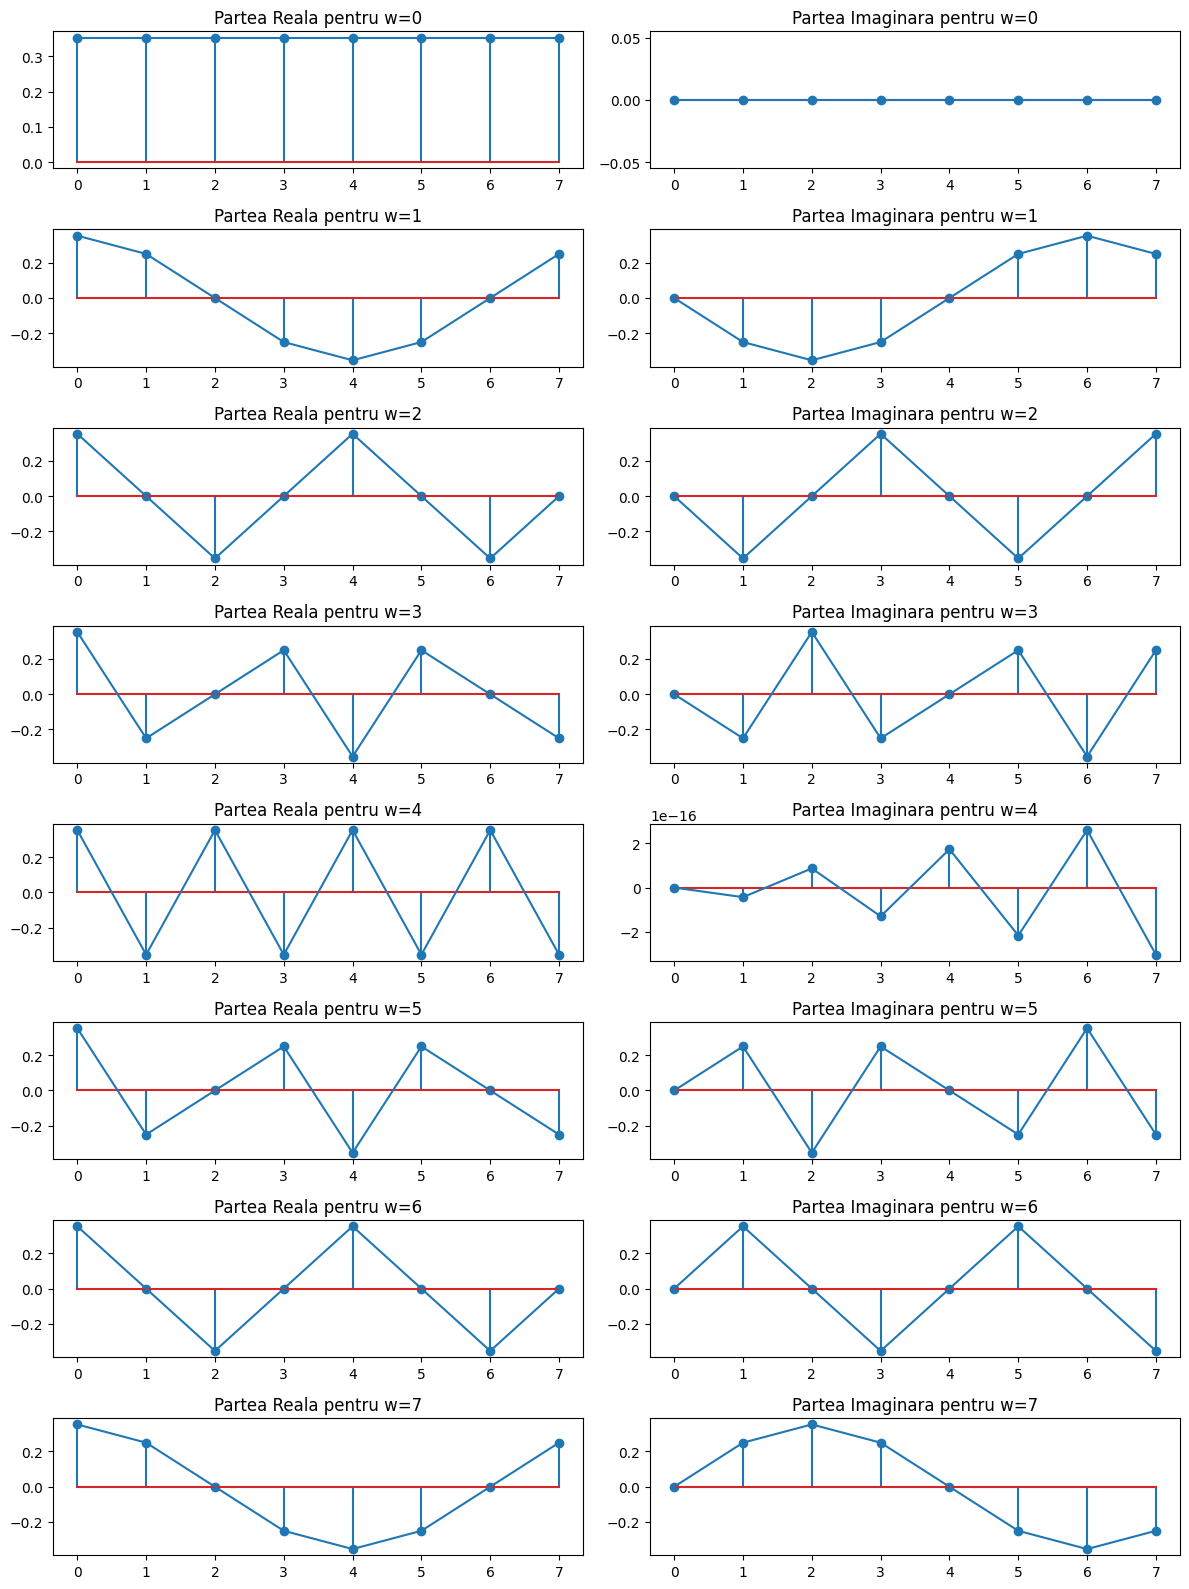

In [64]:
N = 8
F = matrice_Fourier(N)

# Calculam partea reala si partea imaginara
real_part = np.real(F)
imaginary_part = np.imag(F)

# Verificam daca matricea Fourier este unitara
unitary = np.linalg.norm(np.abs(np.dot(F, F.T.conj()) - N * np.eye(N)))
print("Este matricea Fourier unitara:", unitary <= 10**(-4))

fig, axes = plt.subplots(N, 2, figsize=(12, 2*N))
for w in range(N):
    real_part = np.real(F[w])
    imaginary_part = np.imag(F[w])
    
    axes[w, 0].stem(real_part)
    axes[w, 0].plot(real_part)
    axes[w, 0].set_title(f'Partea Reala pentru w={w}')
    
    axes[w, 1].stem(imaginary_part)
    axes[w, 1].plot(imaginary_part)
    axes[w, 1].set_title(f'Partea Imaginara pentru w={w}')

plt.tight_layout()
plt.savefig("grafice/ex1.pdf", format="pdf")
plt.savefig("grafice/ex1.png", format="png")
plt.show()

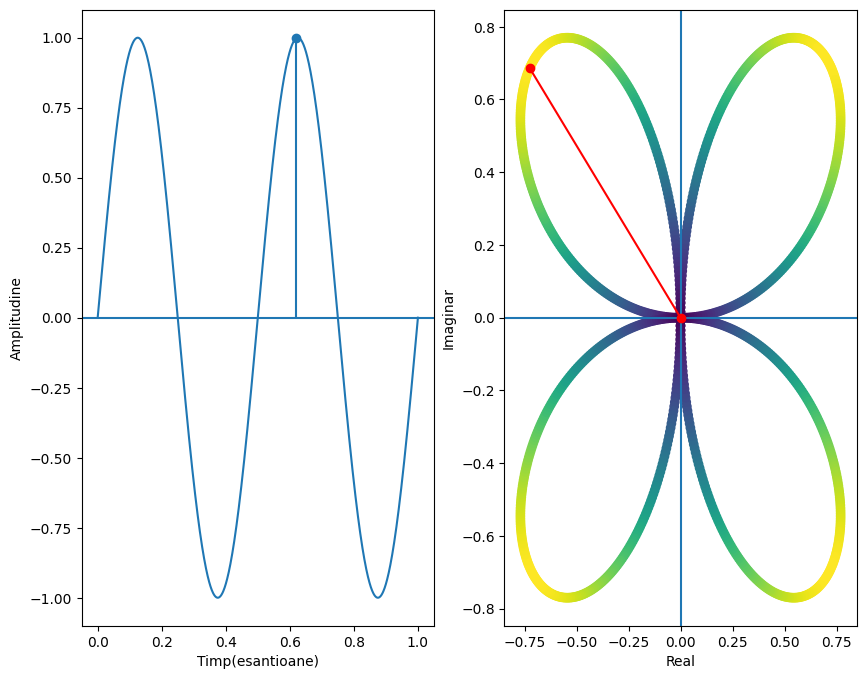

In [51]:
fs = 1000
f = 2
n = 620
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * f * t)
color_fig = np.absolute(x)
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].plot(t,x)
axes[0].axhline()
axes[0].set_xlabel('Timp(esantioane)')
axes[0].set_ylabel('Amplitudine')
axes[0].stem(t[n],x[n])

y = x * math.e**(-2*np.pi*1j*t)
axes[1].scatter(y.real,y.imag,c= color_fig)
axes[1].axvline(x=0)
axes[1].axhline(y=0)
axes[1].set_xlabel('Real')
axes[1].set_ylabel('Imaginar')
axes[1].plot((y[n].real,0), (y[n].imag,0), marker= "o",c='red')
plt.tight_layout()
plt.savefig("grafice/ex2_a.png", format="png")
plt.savefig("grafice/ex2_a.pdf", format="pdf")
plt.show()




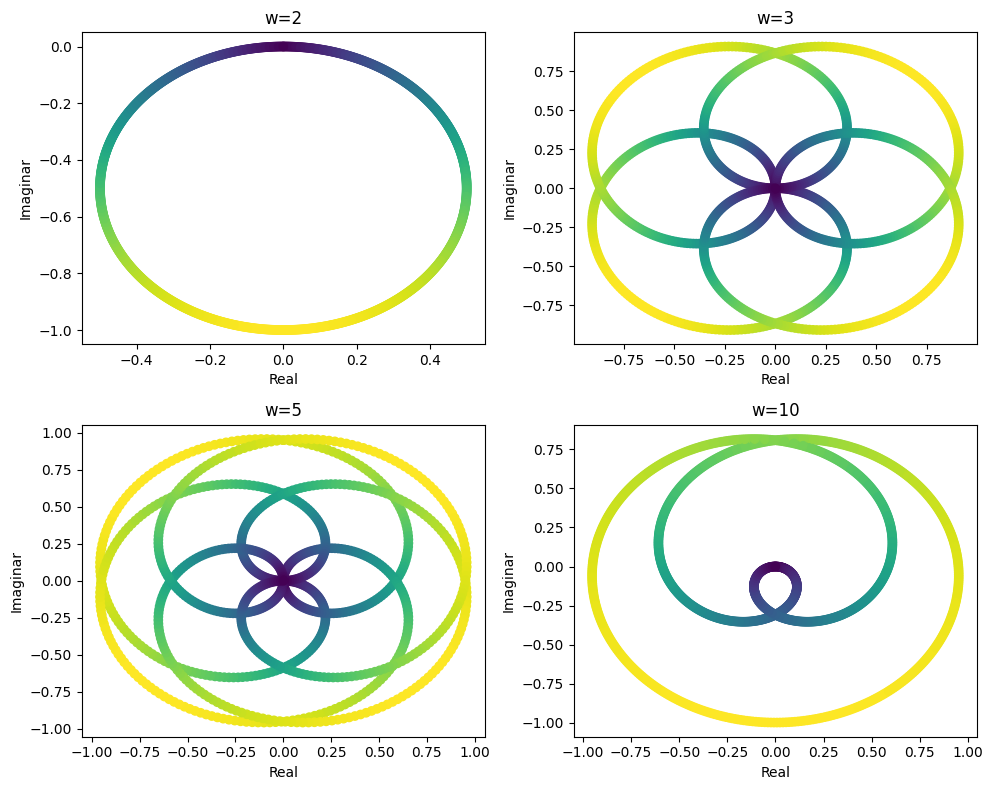

In [54]:
fs = 1000
f = 2
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * f * t)

w_val = [2,3,5,10]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

y1 = x * math.e **(-2*np.pi*1j*t*w_val[0])
y2 = x * math.e **(-2*np.pi*1j*t*w_val[1])
y3 = x * math.e **(-2*np.pi*1j*t*w_val[2])
y4 = x * math.e **(-2*np.pi*1j*t*w_val[3])

colors = [np.absolute(y1),np.absolute(y2),np.absolute(y3),np.absolute(y4)]


axes[0, 0].scatter(y1.real,y1.imag,c=colors[0])
axes[0, 0].set_title(f'w={w_val[0]}')
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Imaginar')
# axes[0, 0].axvline(x=0)
# axes[0, 0].axhline(y=0)

axes[0, 1].scatter(y2.real,y2.imag,c=colors[1])
axes[0, 1].set_title(f'w={w_val[1]}') 
axes[0, 1].set_xlabel('Real')
axes[0, 1].set_ylabel('Imaginar')   
# axes[0, 1].axvline(x=0)
# axes[0, 1].axhline(y=0)

axes[1, 0].scatter(y3.real,y3.imag,c=colors[2])
axes[1, 0].set_title(f'w={w_val[2]}')
axes[1, 0].set_xlabel('Real')
axes[1, 0].set_ylabel('Imaginar')
# axes[1, 0].axvline(x=0)
# axes[1, 0].axhline(y=0)

axes[1, 1].scatter(y4.real,y4.imag,c=colors[3])
axes[1, 1].set_title(f'w={w_val[3]}')
axes[1, 1].set_xlabel('Real')
axes[1, 1].set_ylabel('Imaginar')
# axes[1, 1].axvline(x=0)
# axes[1, 1].axhline(y=0)

plt.tight_layout()
plt.savefig("grafice/ex2_b.png", format="png")
plt.savefig("grafice/ex2_b.pdf", format="pdf")
plt.show()


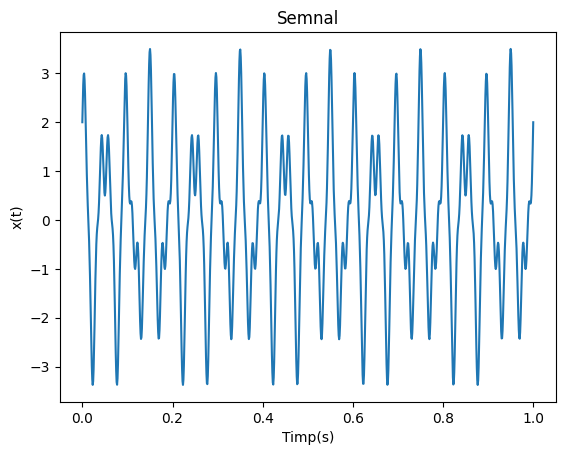

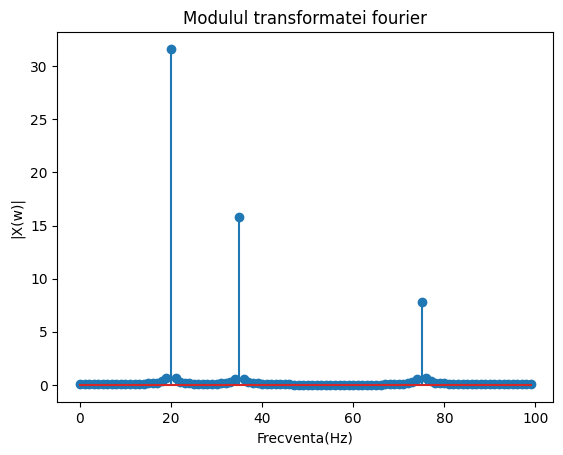

In [66]:
f1 = 35
f2 = 20
f3 = 75
t = np.linspace(0,1,1000)
N = len(t)
signal = np.sin(2 * np.pi * f1 * t)+2*np.cos(2*np.pi * f2*t)+0.5 * np.sin(2*np.pi*f3*t)
plt.plot(t, signal)
plt.title('Semnal')
plt.xlabel('Timp(s)')
plt.ylabel('x(t)')
plt.savefig("grafice/ex3_semnal.png", format="png")
plt.savefig("grafice/ex3_semnal.pdf", format="pdf")
plt.show()

fourier_matrix = matrice_Fourier(N)

x = np.matmul(fourier_matrix,signal)
x = np.abs(x)
plt.stem(x[:100])
plt.title('Modulul transformatei fourier')
plt.xlabel('Frecventa(Hz)')
plt.ylabel('|X(w)|')
plt.savefig("grafice/ex3_modul.png", format="png")
plt.savefig("grafice/ex3_modul.pdf", format="pdf")
plt.show()

In [69]:
f1 = 35
f2 = 20
f3 = 75
t = np.linspace(0,1,1000)
signal = np.sin(2 * np.pi * f1 * t)+2*np.cos(2*np.pi * f2*t)+0.5 * np.sin(2*np.pi*f3*t)

N =  len(t)
# frecventa caracteristica a sinusoidei
w = f1
n = np.arange(0, len(signal), 1)
X =  math.e **  (-2*np.pi*1j*n*w/N)

# corelează practic semnalul cu o exponențială complexă la frecvența f1 
c = np.dot(signal, X)
# puterea (amplitudinea) componentei de frecvență de 35 Hz în semnal.
print(np.abs(c))

499.0332616302489
